<div style="
    background: linear-gradient(90deg, #edafb8, #f7e1d7, #dedbd2, #b0c4b1, #4a5759);
    color: white;
    padding: 20px;
    text-align: center;
    border-radius: 12px;
    font-family: 'Roboto', Arial, sans-serif;
    font-size: 28px;
    font-weight: bold;
    box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);
    letter-spacing: 1px;
">
    📚 <b>Import Libraries</b> 🛠️
</div>

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import datetime as dt

<div style="
    background: linear-gradient(90deg, #edafb8, #f7e1d7, #dedbd2, #b0c4b1, #4a5759);
    color: white;
    padding: 20px;
    text-align: center;
    border-radius: 12px;
    font-family: 'Roboto', Arial, sans-serif;
    font-size: 28px;
    font-weight: bold;
    box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.2);
    letter-spacing: 1px;
">
    📂 <b>Load the Dataset</b> 🧑‍💻
</div>


In [ ]:
purchase_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Chips Data/purchase_behaviour.csv')
transaction = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Chips Data/transaction.xlsx')

In [ ]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
print(f'Shape of Purchase_behaviour Data: {purchase_data.shape}')
print(f'Shape of Transaction Data: {transaction.shape}')

Shape of Purchase_behaviour Data: (72637, 3)
Shape of Transaction Data: (264836, 8)


In [ ]:
purchase_data.info()
print('-'* 45)
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-

In [ ]:
purchase_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


In [ ]:
transaction.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,264836,2018-12-30 00:52:12.879215616,2018-07-01 00:00:00,2018-09-30 00:00:00,2018-12-30 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,NaN
STORE_NBR,264836.0,135.08011,1.0,70.0,130.0,203.0,272.0,76.78418
LYLTY_CARD_NBR,264836.0,135549.476404,1000.0,70021.0,130357.5,203094.25,2373711.0,80579.978022
TXN_ID,264836.0,135158.310815,1.0,67601.5,135137.5,202701.25,2415841.0,78133.026026
PROD_NBR,264836.0,56.583157,1.0,28.0,56.0,85.0,114.0,32.826638
PROD_QTY,264836.0,1.907309,1.0,2.0,2.0,2.0,200.0,0.643654
TOT_SALES,264836.0,7.3042,1.5,5.4,7.4,9.2,650.0,3.083226


In [ ]:
purchase_data.describe(include='O').T

,count,unique,top,freq
LIFESTAGE,72637,7,RETIREES,14805
PREMIUM_CUSTOMER,72637,3,Mainstream,29245


In [ ]:
transaction.describe(include='O').T

,count,unique,top,freq
PROD_NAME,264836,114,Kettle Mozzarella Basil & Pesto 175g,3304


In [ ]:
merged_df = pd.merge(transaction,purchase_data,how='inner',on='LYLTY_CARD_NBR')
merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [ ]:
merged_df.shape

(264836, 10)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


In [ ]:
merged_df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,264836,2018-12-30 00:52:12.879215616,2018-07-01 00:00:00,2018-09-30 00:00:00,2018-12-30 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,NaN
STORE_NBR,264836.0,135.08011,1.0,70.0,130.0,203.0,272.0,76.78418
LYLTY_CARD_NBR,264836.0,135549.476404,1000.0,70021.0,130357.5,203094.25,2373711.0,80579.978022
TXN_ID,264836.0,135158.310815,1.0,67601.5,135137.5,202701.25,2415841.0,78133.026026
PROD_NBR,264836.0,56.583157,1.0,28.0,56.0,85.0,114.0,32.826638
PROD_QTY,264836.0,1.907309,1.0,2.0,2.0,2.0,200.0,0.643654
TOT_SALES,264836.0,7.3042,1.5,5.4,7.4,9.2,650.0,3.083226


In [ ]:
merged_df.duplicated().sum()

1

In [ ]:
merged_df.drop_duplicates()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [ ]:
merged_df['brand'] = merged_df['PROD_NAME'].str.split(pat=' ',expand=True)[0]
merged_df['brand'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
merged_df['Package_Size'] = merged_df['PROD_NAME'].str.split().str[-1].str.extract(r'([0-9]+)').astype(float)
merged_df['Package_Size'].unique()

array([175., 170., 150., 300., 330., 210., 270., 220., 125., 110., 134.,
       380., 180., 165.,  nan, 250., 200., 160., 190.,  90.,  70.])

In [ ]:
merged_df = merged_df[merged_df['PROD_NAME'].str.contains(r"[Ss]alsa") == False]

In [ ]:
merged_df['brand'].value_counts()

,count
brand,
Kettle,41288
Smiths,27390
Pringles,25102
Doritos,22041
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


In [ ]:
company_replacements = {
    'Smith':'Smiths',
    'Dorito': 'Doritos',
    'Red':'RRD',
    'Infzns':'Infuzions',
    'WW': 'Woolworths',
    'CCs':'Cheezels',
    'Grain':'GrainWaves',
    'GrnWves':'GrainWaves',
    'Natural':'NaturalChips',
    'NCC':'NaturalChips',
    'Snbts':'Sunbites'
}

merged_df['brand'] = merged_df['brand'].replace(company_replacements)


<ipython-input-69-d6fef7c262ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['brand'] = merged_df['brand'].replace(company_replacements)


In [ ]:
merged_df.drop(columns='PROD_NAME',inplace=True)

<ipython-input-70-d8d8600b4193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop(columns='PROD_NAME',inplace=True)


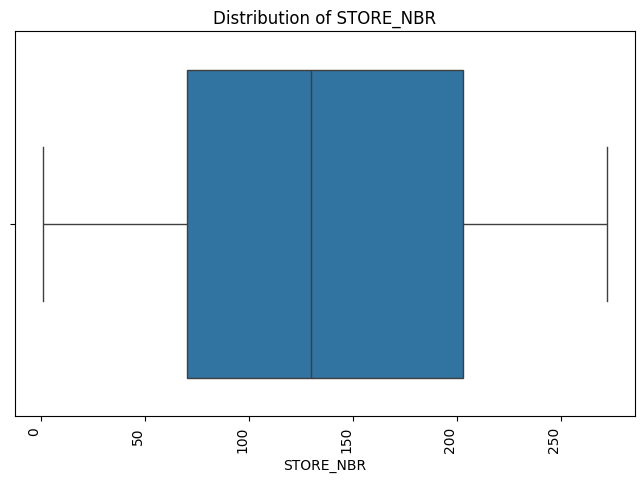

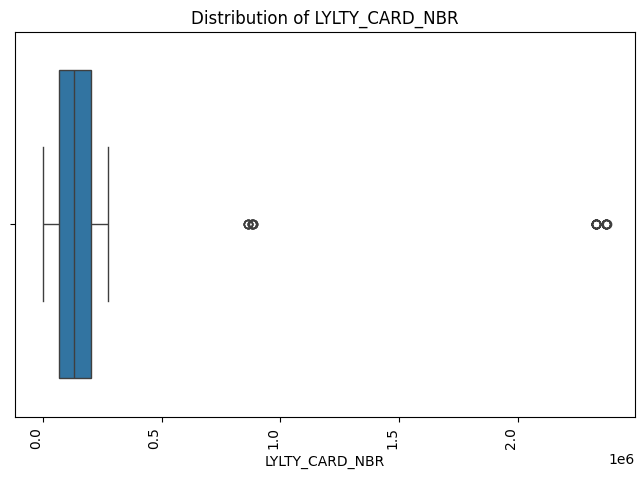

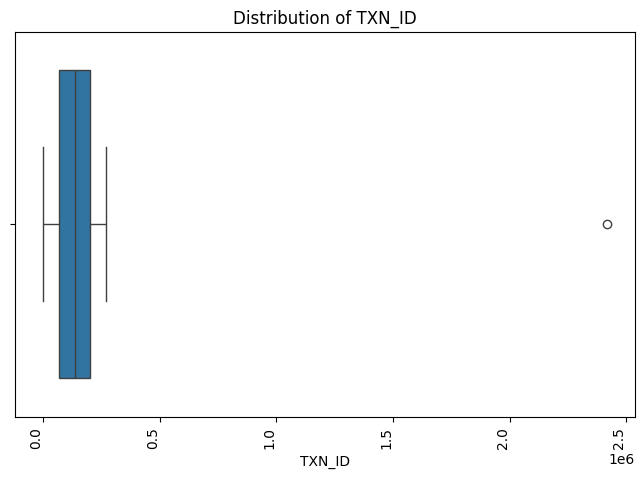

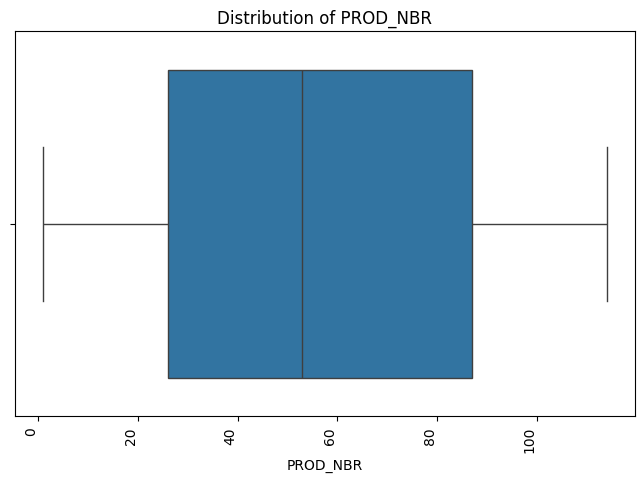

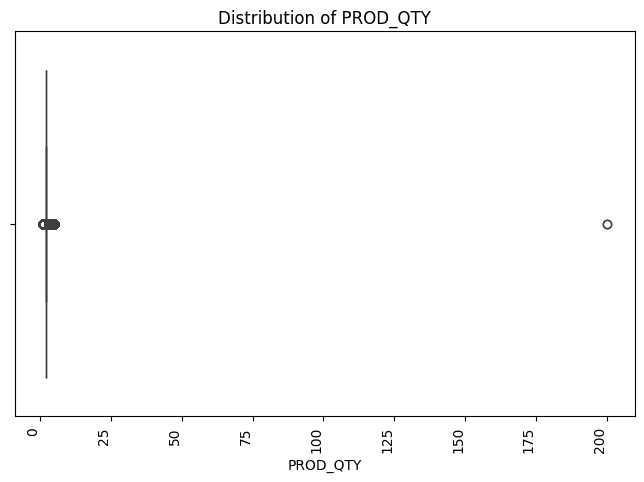

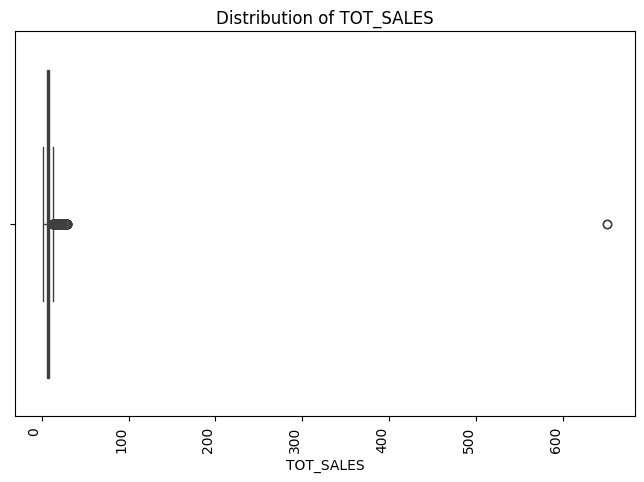

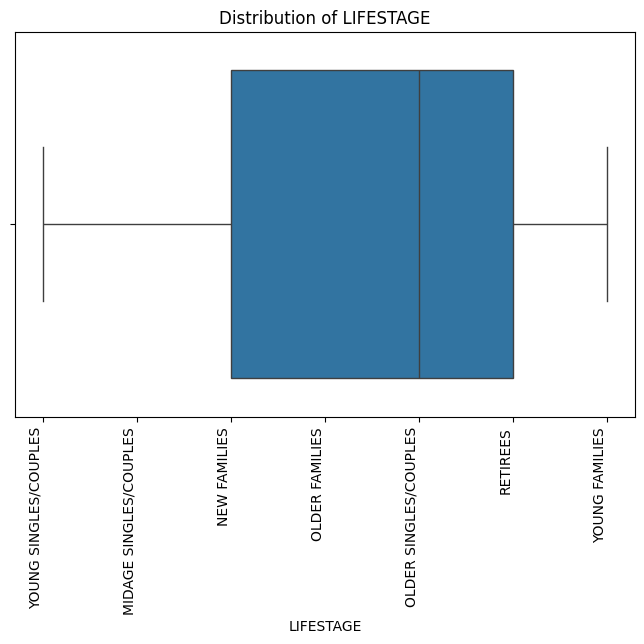

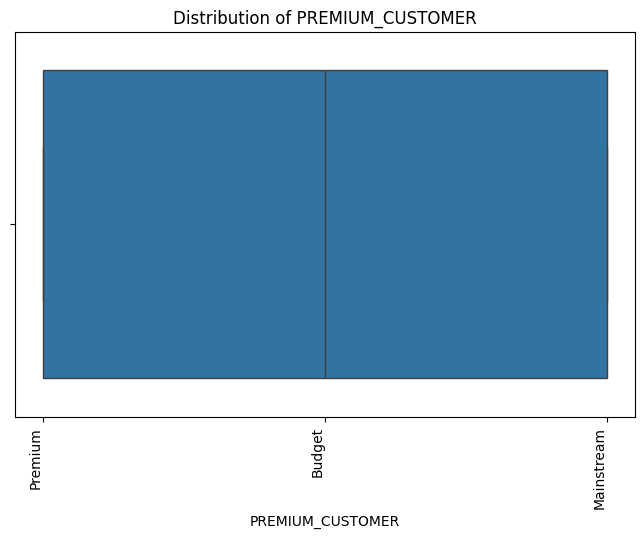

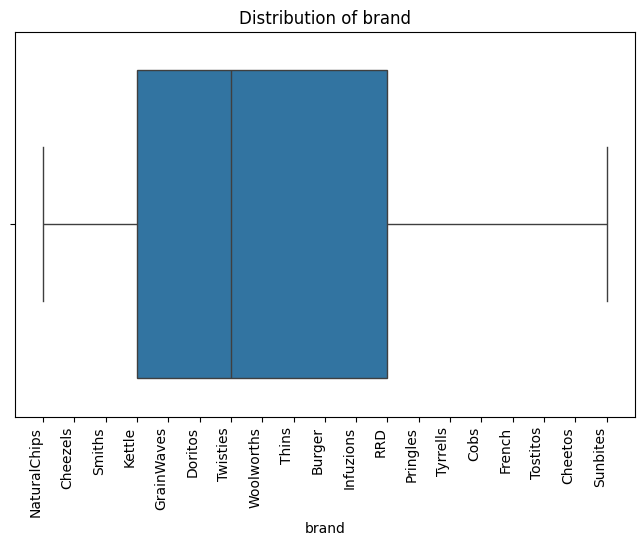

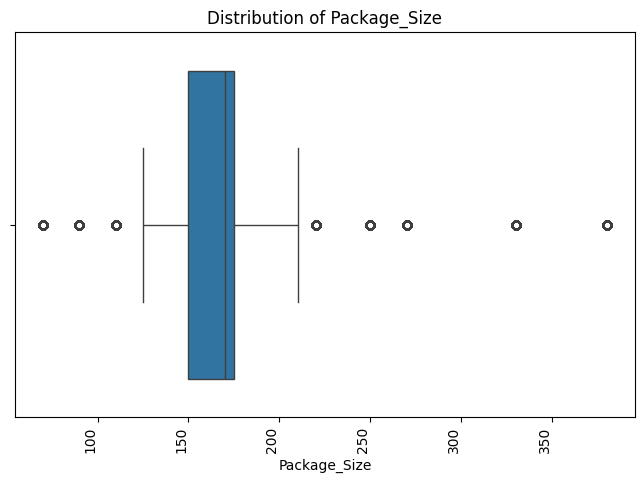

In [ ]:
for i, column in enumerate(merged_df.select_dtypes(['number','object']).columns):
    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(data=merged_df, x=column)
    ax.set_xlabel(column)
    ticks = ax.get_xticks()
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, horizontalalignment='right')

    ax.set_title(f'Distribution of {column}')
    plt.show()

In [ ]:
drop = merged_df[merged_df['TOT_SALES']>100].index
merged_df.drop(drop, inplace=True)

<ipython-input-72-5c37138fd5bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop(drop, inplace=True)


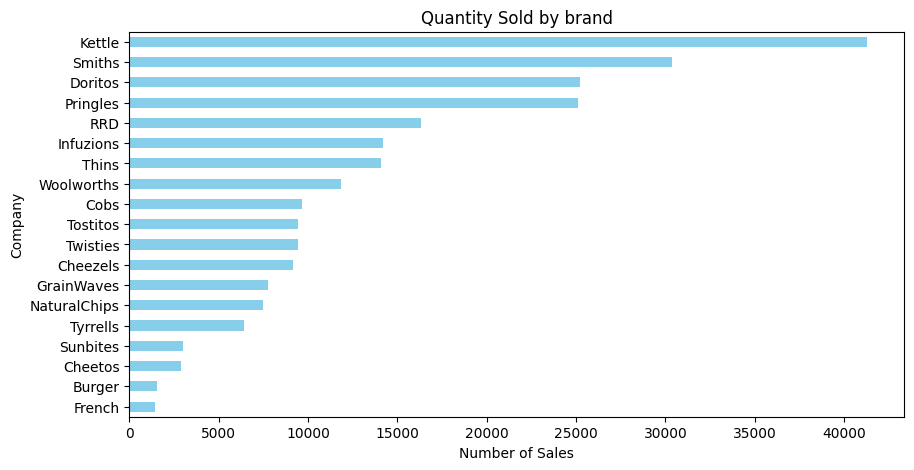

In [ ]:
plt.figure(figsize=(10, 5))
grouped_brand = merged_df.groupby('brand')['brand'].count().sort_values(ascending=True)
grouped_brand.plot(kind='barh',color='skyblue')
plt.title('Quantity Sold by brand')
plt.xlabel('Number of Sales')
plt.ylabel('Company')
plt.show()

Text(0, 0.5, 'Company')

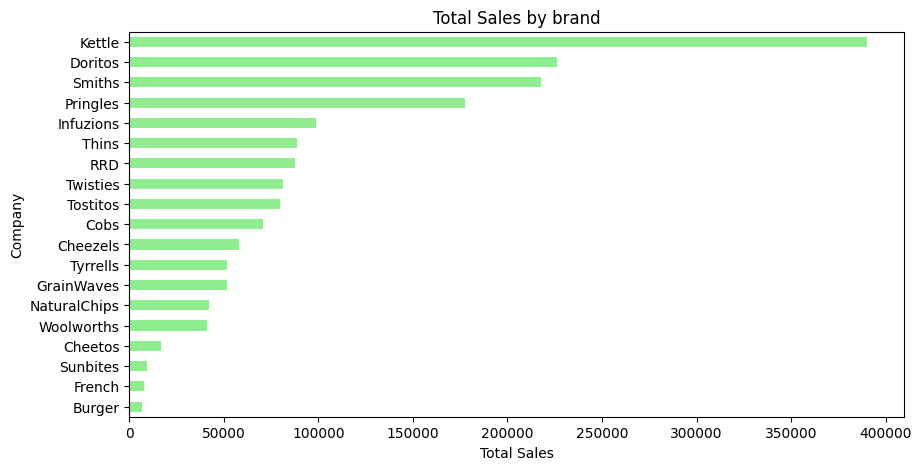

In [ ]:
plt.figure(figsize=(10, 5))
grouped_sales = merged_df.groupby('brand')['TOT_SALES'].sum().sort_values(ascending=True)
grouped_sales.plot(kind='barh',color='lightgreen')
plt.title('Total Sales by brand')
plt.xlabel('Total Sales')
plt.ylabel('Company')


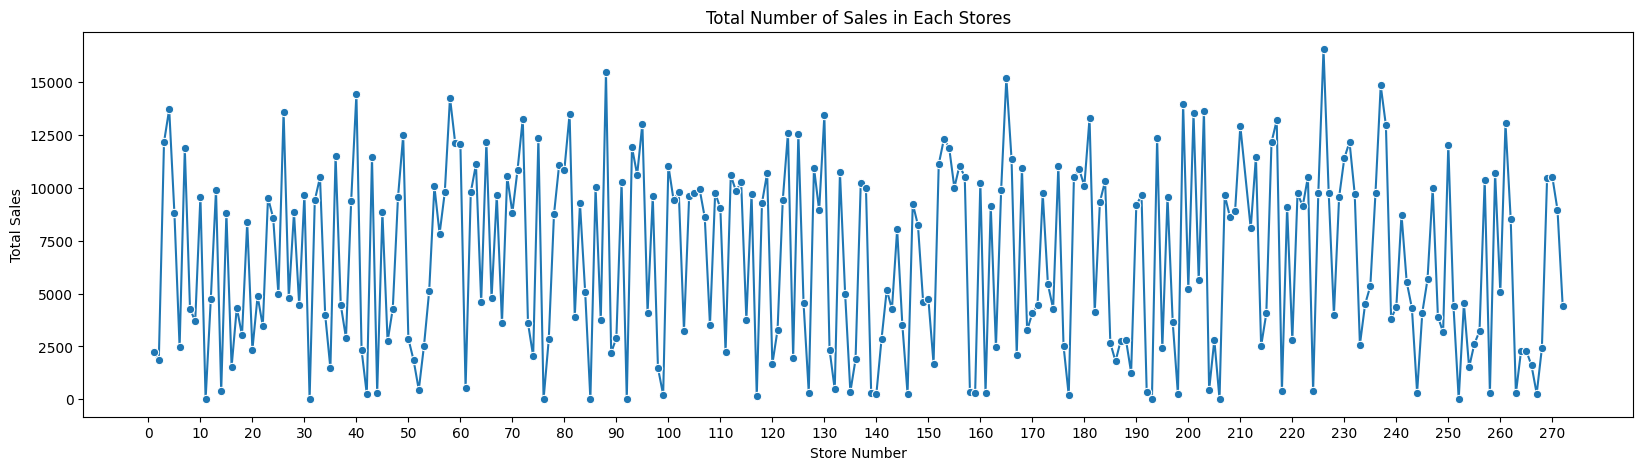

In [ ]:
group_store = merged_df.groupby("STORE_NBR")["TOT_SALES"].sum()
str_nbr = group_store.keys()
sales = group_store.tolist()

plt.figure(figsize=(20,5))
sns.lineplot(x=str_nbr, y = sales,marker='o')
plt.xticks(range(0,272,10))
plt.title("Total Number of Sales in Each Stores")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

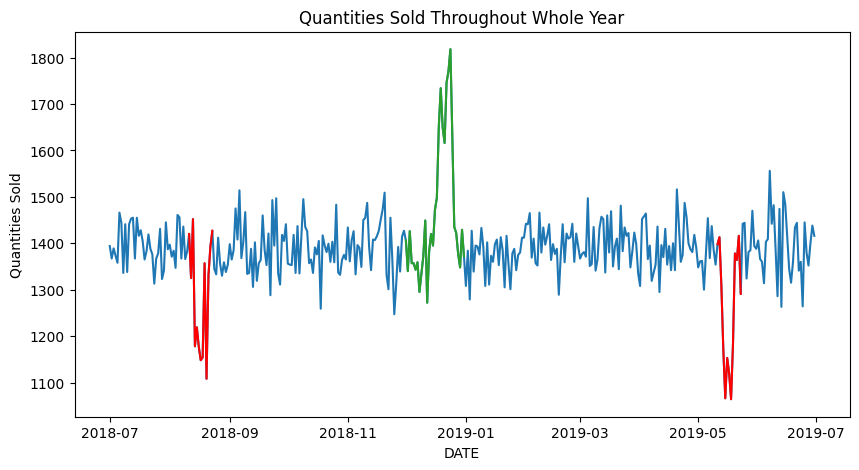

In [ ]:
plt.figure(figsize=(10,5))
group_date = transaction.groupby('DATE')['PROD_QTY'].sum().reset_index()
sns.lineplot(data=group_date,x='DATE',y='PROD_QTY')
sns.lineplot(x="DATE", y="PROD_QTY", data=group_date[(group_date['DATE'] > '2018-11-30') & (group_date['DATE'] < '2019-01-01')], color='#2ca02c')
sns.lineplot(x="DATE", y="PROD_QTY", data=group_date[(group_date['DATE'] > '2018-08-10') & (group_date['DATE'] < '2018-08-24')], color='red')
sns.lineplot(x="DATE", y="PROD_QTY", data=group_date[(group_date['DATE'] > '2019-05-10') & (group_date['DATE'] < '2019-05-24')], color='red')
plt.ylabel('Quantities Sold')
plt.title('Quantities Sold Throughout Whole Year')
plt.show()

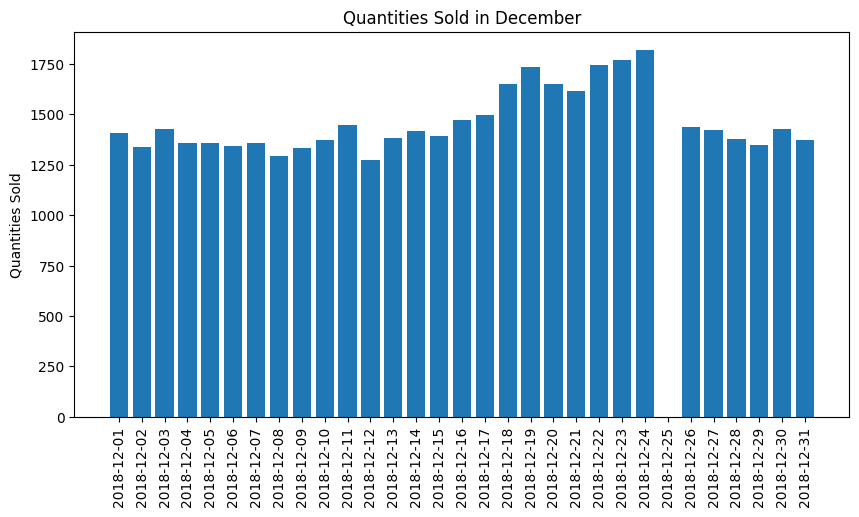

In [ ]:
plt.figure(figsize=(10,5))

december = group_date[group_date['DATE'].isin(pd.date_range(start="2018-12-01",end="2018-12-31").tolist())]

december = december.set_index('DATE').reindex(pd.date_range(start="2018-12-01",end="2018-12-31"), fill_value=0)

plt.bar(december.index,december['PROD_QTY'])
plt.xticks(december.index, rotation=90)
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter("%b-%d"))
plt.ylabel('Quantities Sold')
plt.title('Quantities Sold in December')
plt.show()

<Figure size 1000x500 with 0 Axes>

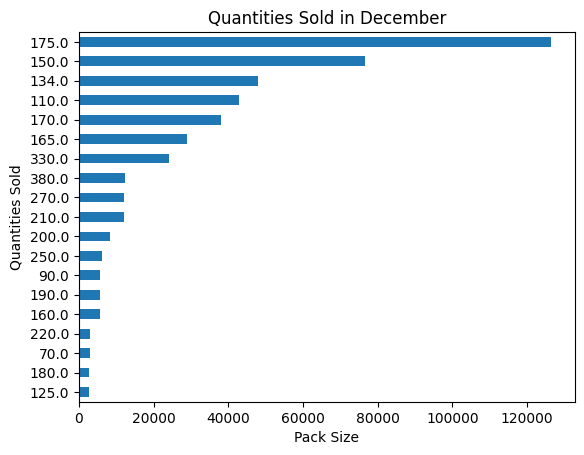

In [ ]:
plt.figure(figsize=(10,5))
merged_df.groupby('Package_Size')['PROD_QTY'].sum().sort_values().reset_index().plot.barh(x='Package_Size', legend=False)
plt.xlabel('Pack Size')
plt.ylabel('Quantities Sold')
plt.title('Quantities Sold in December')
plt.show()

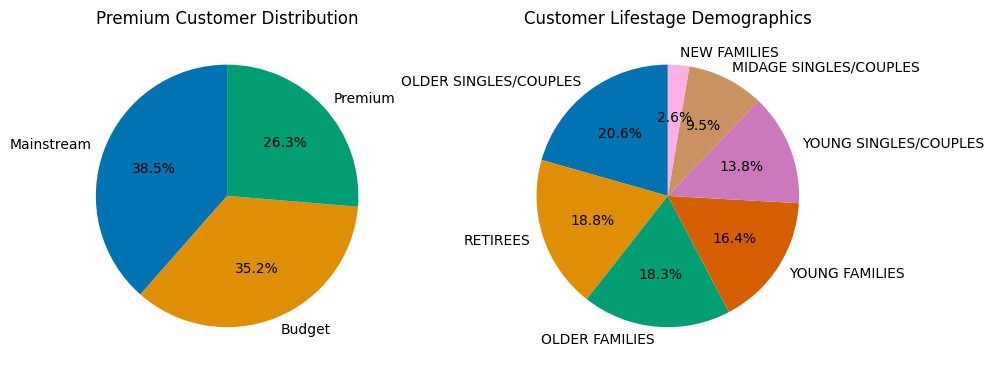

In [ ]:
premium_customers = merged_df['PREMIUM_CUSTOMER'].value_counts()
lifestage_customers = merged_df['LIFESTAGE'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(premium_customers, labels=premium_customers.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("colorblind"))
axes[0].set_title('Premium Customer Distribution')

axes[1].pie(lifestage_customers, labels=lifestage_customers.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("colorblind"))
axes[1].set_title('Customer Lifestage Demographics')

plt.tight_layout()
plt.show()

In [ ]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'brand', 'Package_Size'],
      dtype='object')

<ipython-input-81-34b12f9c5806>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Premium_customers, x='PREMIUM_CUSTOMER', y='TOT_SALES', palette='viridis')


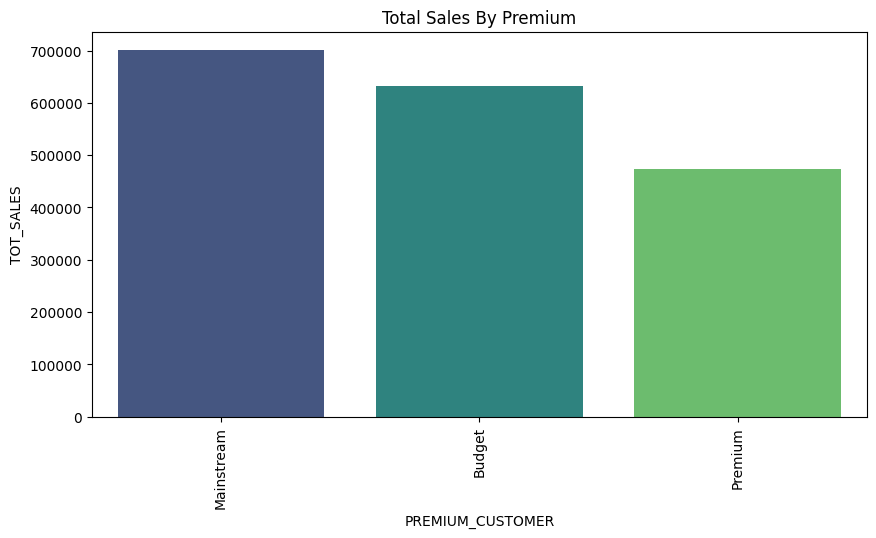

In [ ]:
plt.figure(figsize=(10, 5))
Premium_customers = merged_df.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=Premium_customers, x='PREMIUM_CUSTOMER', y='TOT_SALES', palette='viridis')
plt.title('Total Sales By Premium')
plt.xticks(rotation=90)
plt.show()

<ipython-input-82-b142a8033e53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Premium_customers, x='LIFESTAGE', y='TOT_SALES', palette='viridis')


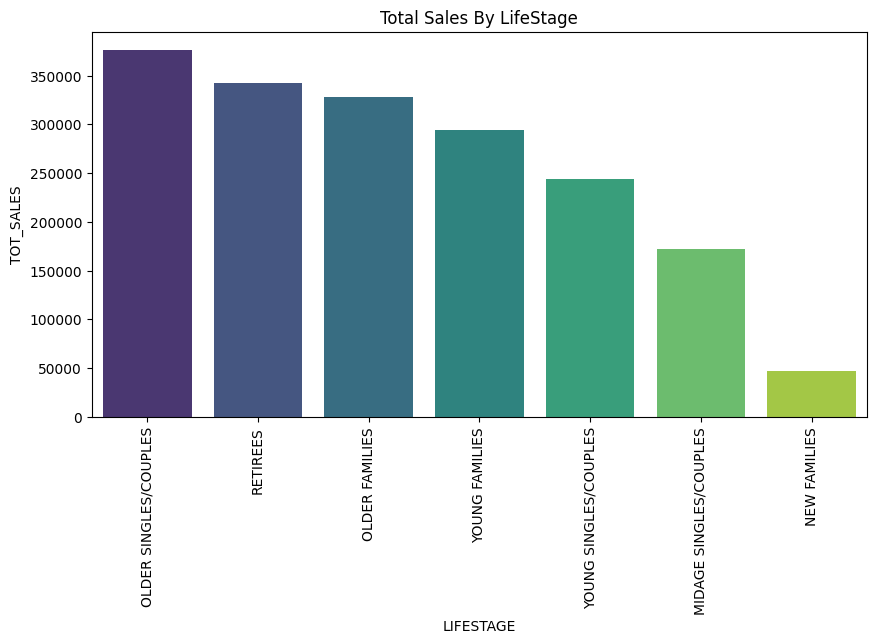

In [ ]:
plt.figure(figsize=(10, 5))
Premium_customers = merged_df.groupby(['LIFESTAGE'])['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=Premium_customers, x='LIFESTAGE', y='TOT_SALES', palette='viridis')
plt.title('Total Sales By LifeStage')
plt.xticks(rotation=90)
plt.show()

In [ ]:
life_prem = merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum','PROD_QTY':'sum', 'TXN_ID':'count'}).reset_index().sort_values('TOT_SALES') # sort by TOT_SALES
life_prem['Group'] = life_prem['LIFESTAGE'] + '_' + life_prem['PREMIUM_CUSTOMER']

life_prem_qty = life_prem.sort_values('PROD_QTY')
life_prem_qty

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,TXN_ID,Group
5,NEW FAMILIES,Premium,10760.80,2769,1488,NEW FAMILIES_Premium
4,NEW FAMILIES,Mainstream,15979.70,4060,2185,NEW FAMILIES_Mainstream
3,NEW FAMILIES,Budget,20607.45,5241,2824,NEW FAMILIES_Budget
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,8883,4691,MIDAGE SINGLES/COUPLES_Budget
20,YOUNG SINGLES/COUPLES,Premium,39052.30,10575,5852,YOUNG SINGLES/COUPLES_Premium
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,14400,7612,MIDAGE SINGLES/COUPLES_Premium
18,YOUNG SINGLES/COUPLES,Budget,57122.10,15500,8573,YOUNG SINGLES/COUPLES_Budget
8,OLDER FAMILIES,Premium,75242.60,20239,10403,OLDER FAMILIES_Premium
17,YOUNG FAMILIES,Premium,78571.70,20901,10784,YOUNG FAMILIES_Premium
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,21213,11095,MIDAGE SINGLES/COUPLES_Mainstream


<ipython-input-84-1068fc89966c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=life_prem, x='TOT_SALES', y='Group', palette='coolwarm').invert_yaxis()


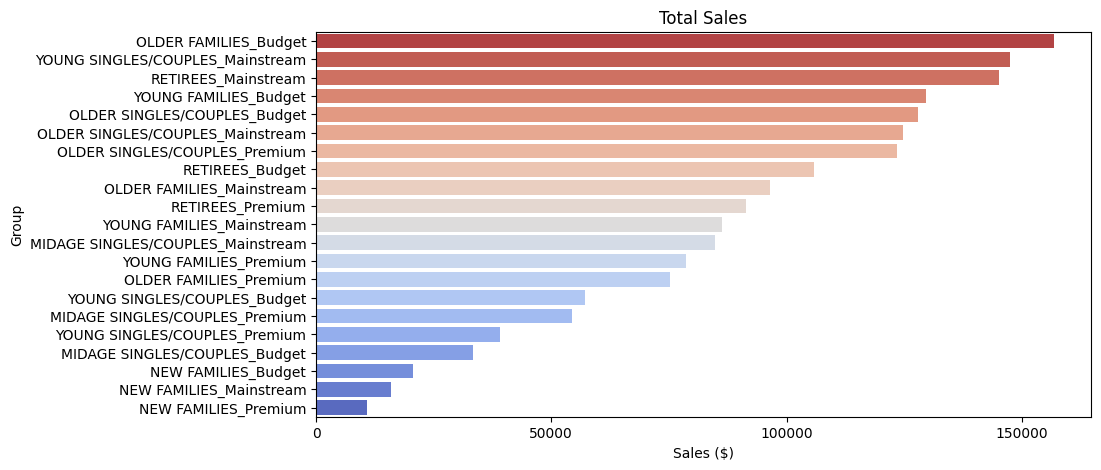

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=life_prem, x='TOT_SALES', y='Group', palette='coolwarm').invert_yaxis()
plt.title('Total Sales')
plt.xlabel('Sales ($)')
plt.xticks(ticks=[0, 50000, 100000, 150000])
plt.show()

<ipython-input-85-426bccaccc9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=life_prem, x='PROD_QTY', y='Group', palette='viridis').invert_yaxis()


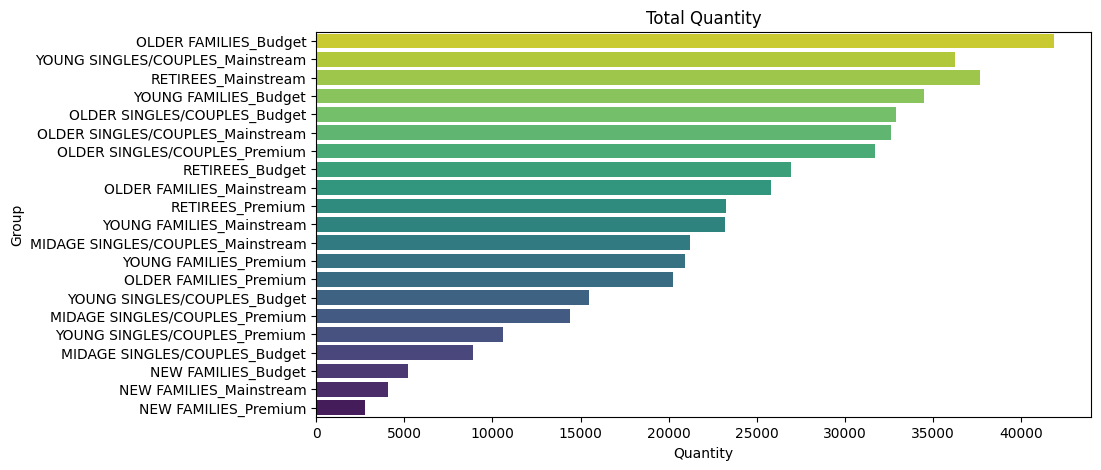

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=life_prem, x='PROD_QTY', y='Group', palette='viridis').invert_yaxis()
plt.title('Total Quantity')
plt.xlabel('Quantity')
plt.show()

In [ ]:
life_prem_puc = merged_df[['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER']].drop_duplicates('LYLTY_CARD_NBR').reset_index(drop=True).groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().reset_index(name='Count').sort_values('Count').merge(life_prem, on=['LIFESTAGE','PREMIUM_CUSTOMER'])

life_prem_puc['SALES_PER_C'] = life_prem_puc['TOT_SALES']/life_prem_puc['TXN_ID']
life_prem_puc['SALES_PER_UC'] = life_prem_puc['TOT_SALES']/life_prem_puc['Count']
life_prem_puc = life_prem_puc.sort_values('SALES_PER_C')

<ipython-input-87-7c56957d6828>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=life_prem_puc, x='SALES_PER_C', y='Group', palette='viridis').invert_yaxis()


Text(0.5, 0, 'Sales')

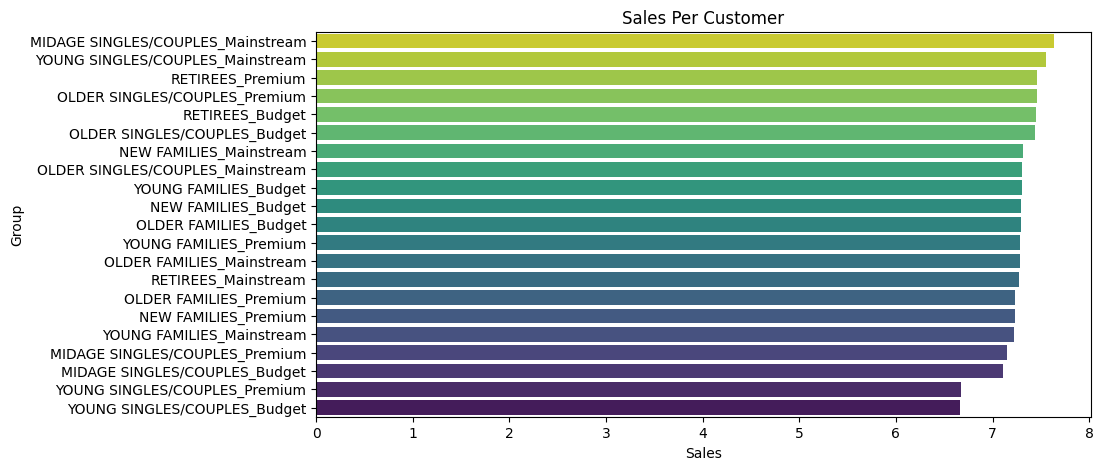

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=life_prem_puc, x='SALES_PER_C', y='Group', palette='viridis').invert_yaxis()
plt.title('Sales Per Customer')
plt.xlabel('Sales')


<ipython-input-88-84e7c4a638d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=life_prem_pc_sorted, x='SALES_PER_UC', y='Group', palette='rocket').invert_yaxis()


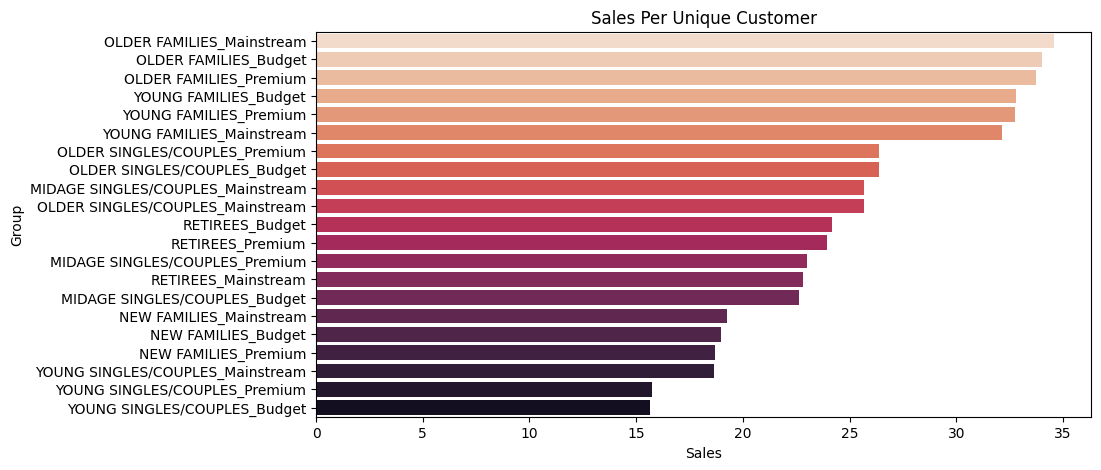

In [ ]:
plt.figure(figsize=(10, 5))
life_prem_pc_sorted = life_prem_puc.sort_values('SALES_PER_UC')
sns.barplot(data=life_prem_pc_sorted, x='SALES_PER_UC', y='Group', palette='rocket').invert_yaxis()
plt.title('Sales Per Unique Customer')
plt.xlabel('Sales')
plt.show()

In [ ]:
life_prem_puc['QTY_PER_C'] = life_prem_puc['PROD_QTY']/life_prem_puc['TXN_ID']
life_prem_puc['QTY_PER_UC'] = life_prem_puc['PROD_QTY']/life_prem_puc['Count']
life_prem_puc = life_prem_puc.sort_values('QTY_PER_C')

<ipython-input-90-df8141873d3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=life_prem_puc, x='QTY_PER_C', y='Group', palette='magma').invert_yaxis()


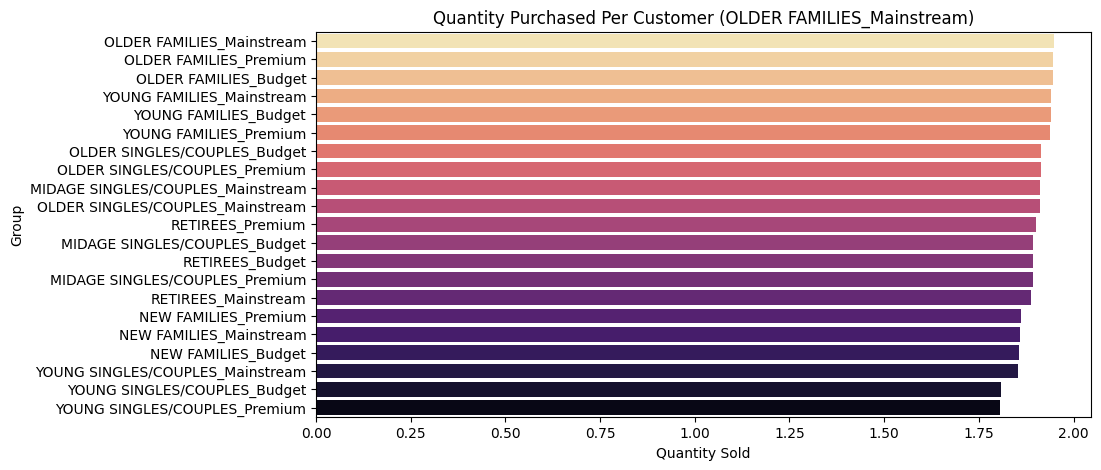

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=life_prem_puc, x='QTY_PER_C', y='Group', palette='magma').invert_yaxis()
plt.title('Quantity Purchased Per Customer (OLDER FAMILIES_Mainstream)')
plt.xlabel('Quantity Sold')
plt.show()

<ipython-input-91-c461a8922012>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=life_prem_puc, x='QTY_PER_UC', y='Group', palette='crest').invert_yaxis()


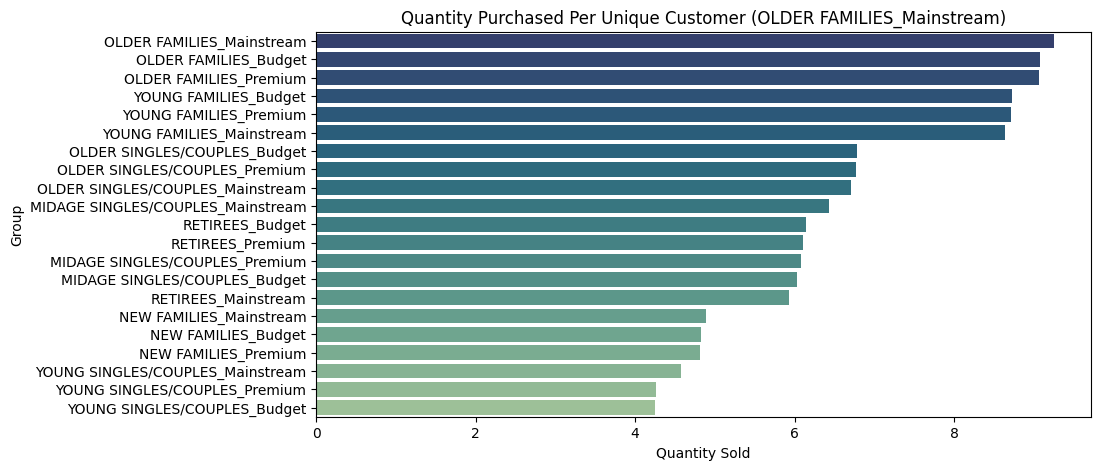

In [ ]:
plt.figure(figsize=(10,5))
life_prem_puc = life_prem_puc.sort_values('QTY_PER_UC')
sns.barplot(data=life_prem_puc, x='QTY_PER_UC', y='Group', palette='crest').invert_yaxis()
plt.title('Quantity Purchased Per Unique Customer (OLDER FAMILIES_Mainstream)')
plt.xlabel('Quantity Sold')
plt.show()

<ipython-input-92-fa679b864794>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=life_prem_pc, y='Group', x='Count',palette = 'coolwarm').invert_yaxis()


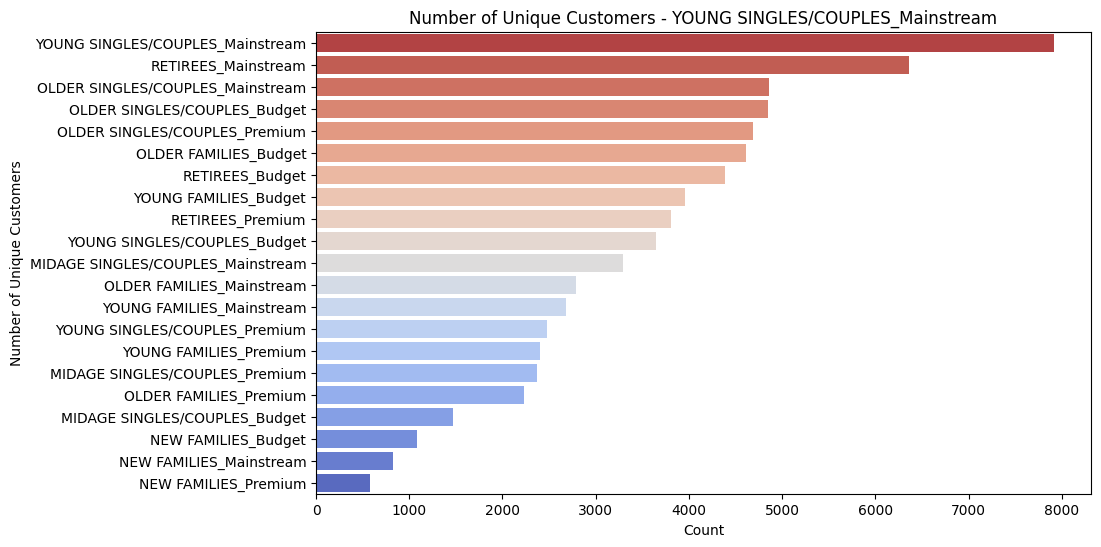

In [ ]:
plt.figure(figsize=(10,6))
life_prem_pc = life_prem_puc.sort_values('Count')
sns.barplot(data=life_prem_pc, y='Group', x='Count',palette = 'coolwarm').invert_yaxis()
plt.title('Number of Unique Customers - YOUNG SINGLES/COUPLES_Mainstream')
plt.ylabel('Number of Unique Customers')
plt.show()

<ipython-input-93-491dc2ee1d98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['PRICE_PER_UNIT'] = merged_df['TOT_SALES'] / merged_df['PROD_QTY']
<ipython-input-93-491dc2ee1d98>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_per_unit, y='Group', x='PRICE_PER_UNIT',palette='magma').invert_yaxis()


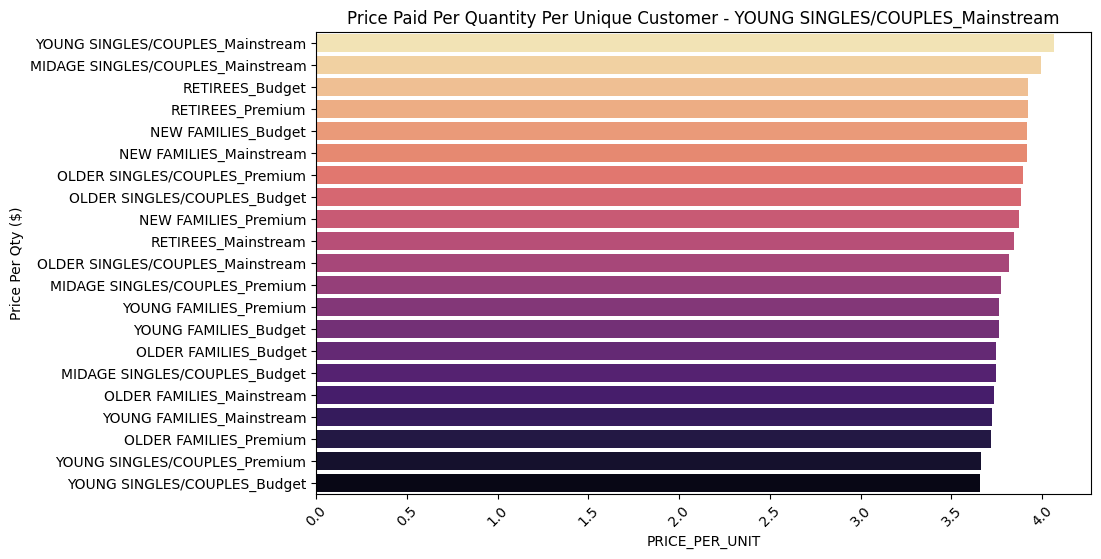

In [ ]:
merged_df['PRICE_PER_UNIT'] = merged_df['TOT_SALES'] / merged_df['PROD_QTY']

price_per_unit = (
    merged_df.groupby('LYLTY_CARD_NBR')
    .agg({'PRICE_PER_UNIT': 'mean'})
    .reset_index()
    .merge(merged_df[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']], on='LYLTY_CARD_NBR')
    .groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    .agg({'PRICE_PER_UNIT': 'mean'})
    .reset_index()
    .sort_values('PRICE_PER_UNIT')
)

price_per_unit['Group'] = price_per_unit['LIFESTAGE'] + '_' + price_per_unit['PREMIUM_CUSTOMER']

plt.figure(figsize=(10, 6))
sns.barplot(data=price_per_unit, y='Group', x='PRICE_PER_UNIT',palette='magma').invert_yaxis()
plt.title('Price Paid Per Quantity Per Unique Customer - YOUNG SINGLES/COUPLES_Mainstream')
plt.ylabel('Price Per Qty ($)')
plt.xticks(rotation=45)
plt.show()